In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb=pd.read_csv('/content/AB_NYC_2019.csv')

In [3]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [4]:
airbnb.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

Dropping unnecessary columns

In [5]:
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

Replace the 'reviews per month' by zero

In [6]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

Remove the NaN values from the dataset

In [7]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22043 entries, 0 to 22057
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            22043 non-null  object 
 1   host_id                         22043 non-null  int64  
 2   neighbourhood_group             22043 non-null  object 
 3   neighbourhood                   22043 non-null  object 
 4   latitude                        22043 non-null  float64
 5   longitude                       22043 non-null  float64
 6   room_type                       22043 non-null  object 
 7   price                           22043 non-null  float64
 8   minimum_nights                  22043 non-null  float64
 9   number_of_reviews               22043 non-null  float64
 10  reviews_per_month               22043 non-null  float64
 11  calculated_host_listings_count  22043 non-null  float64
 12  availability_365                22043

The global price distribution

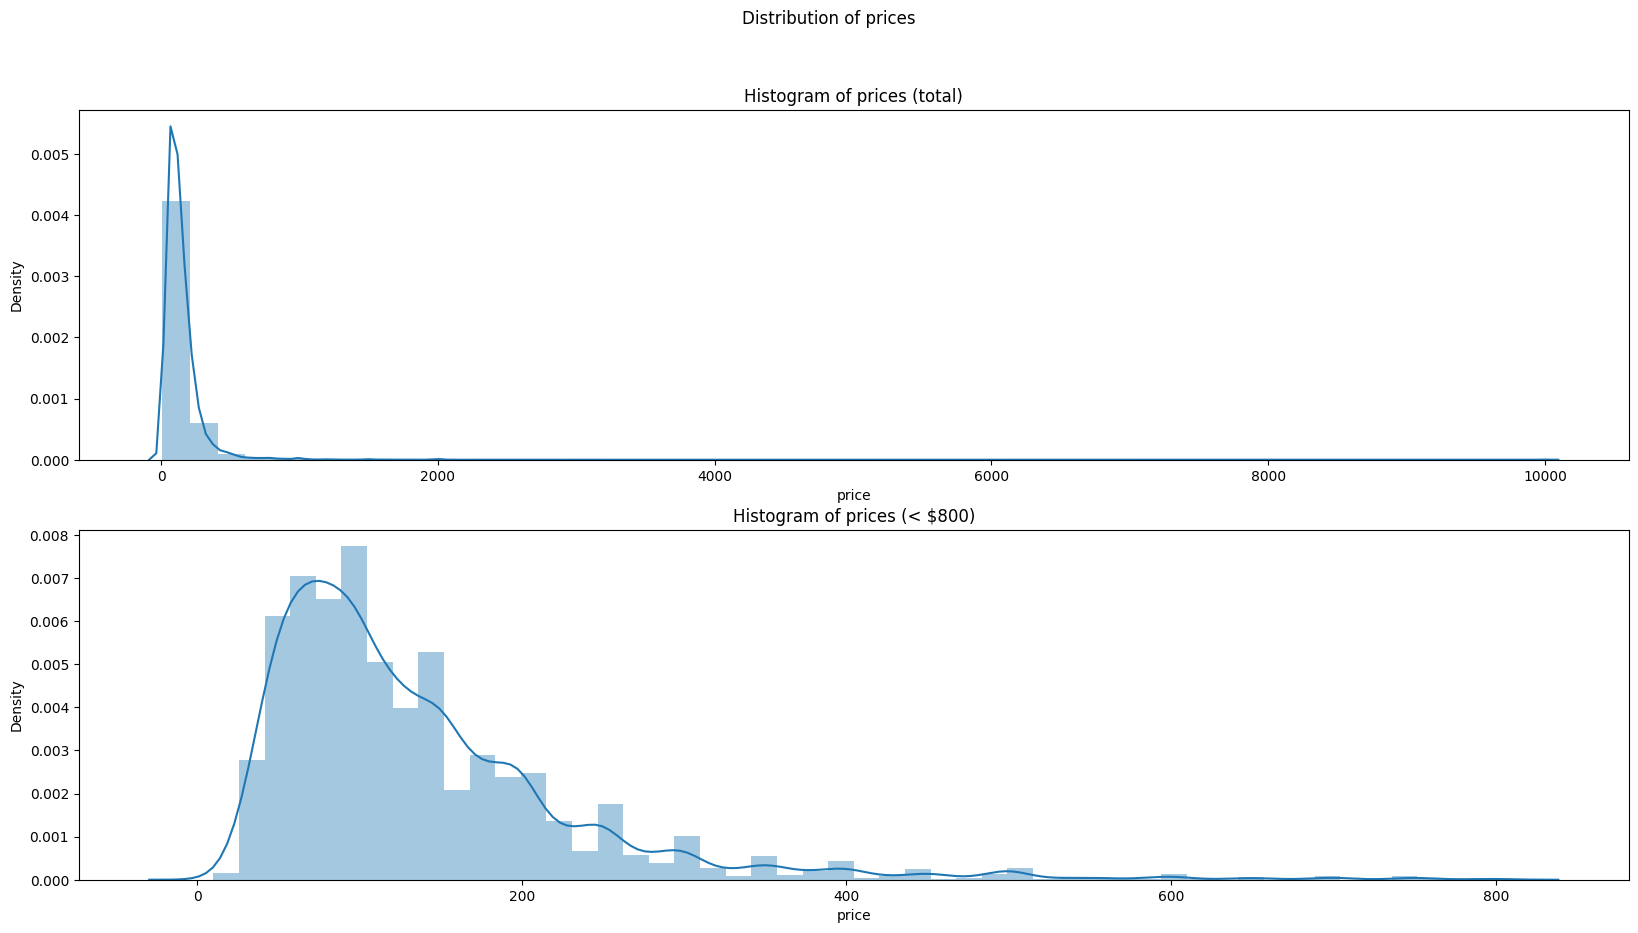

In [8]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(airbnb['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(airbnb[airbnb['price'] < 800]['price'], kde=True, ax=ax[1])

fig.suptitle("Distribution of prices")
fig.show()

The most expensive zones-spatial distribution of prices

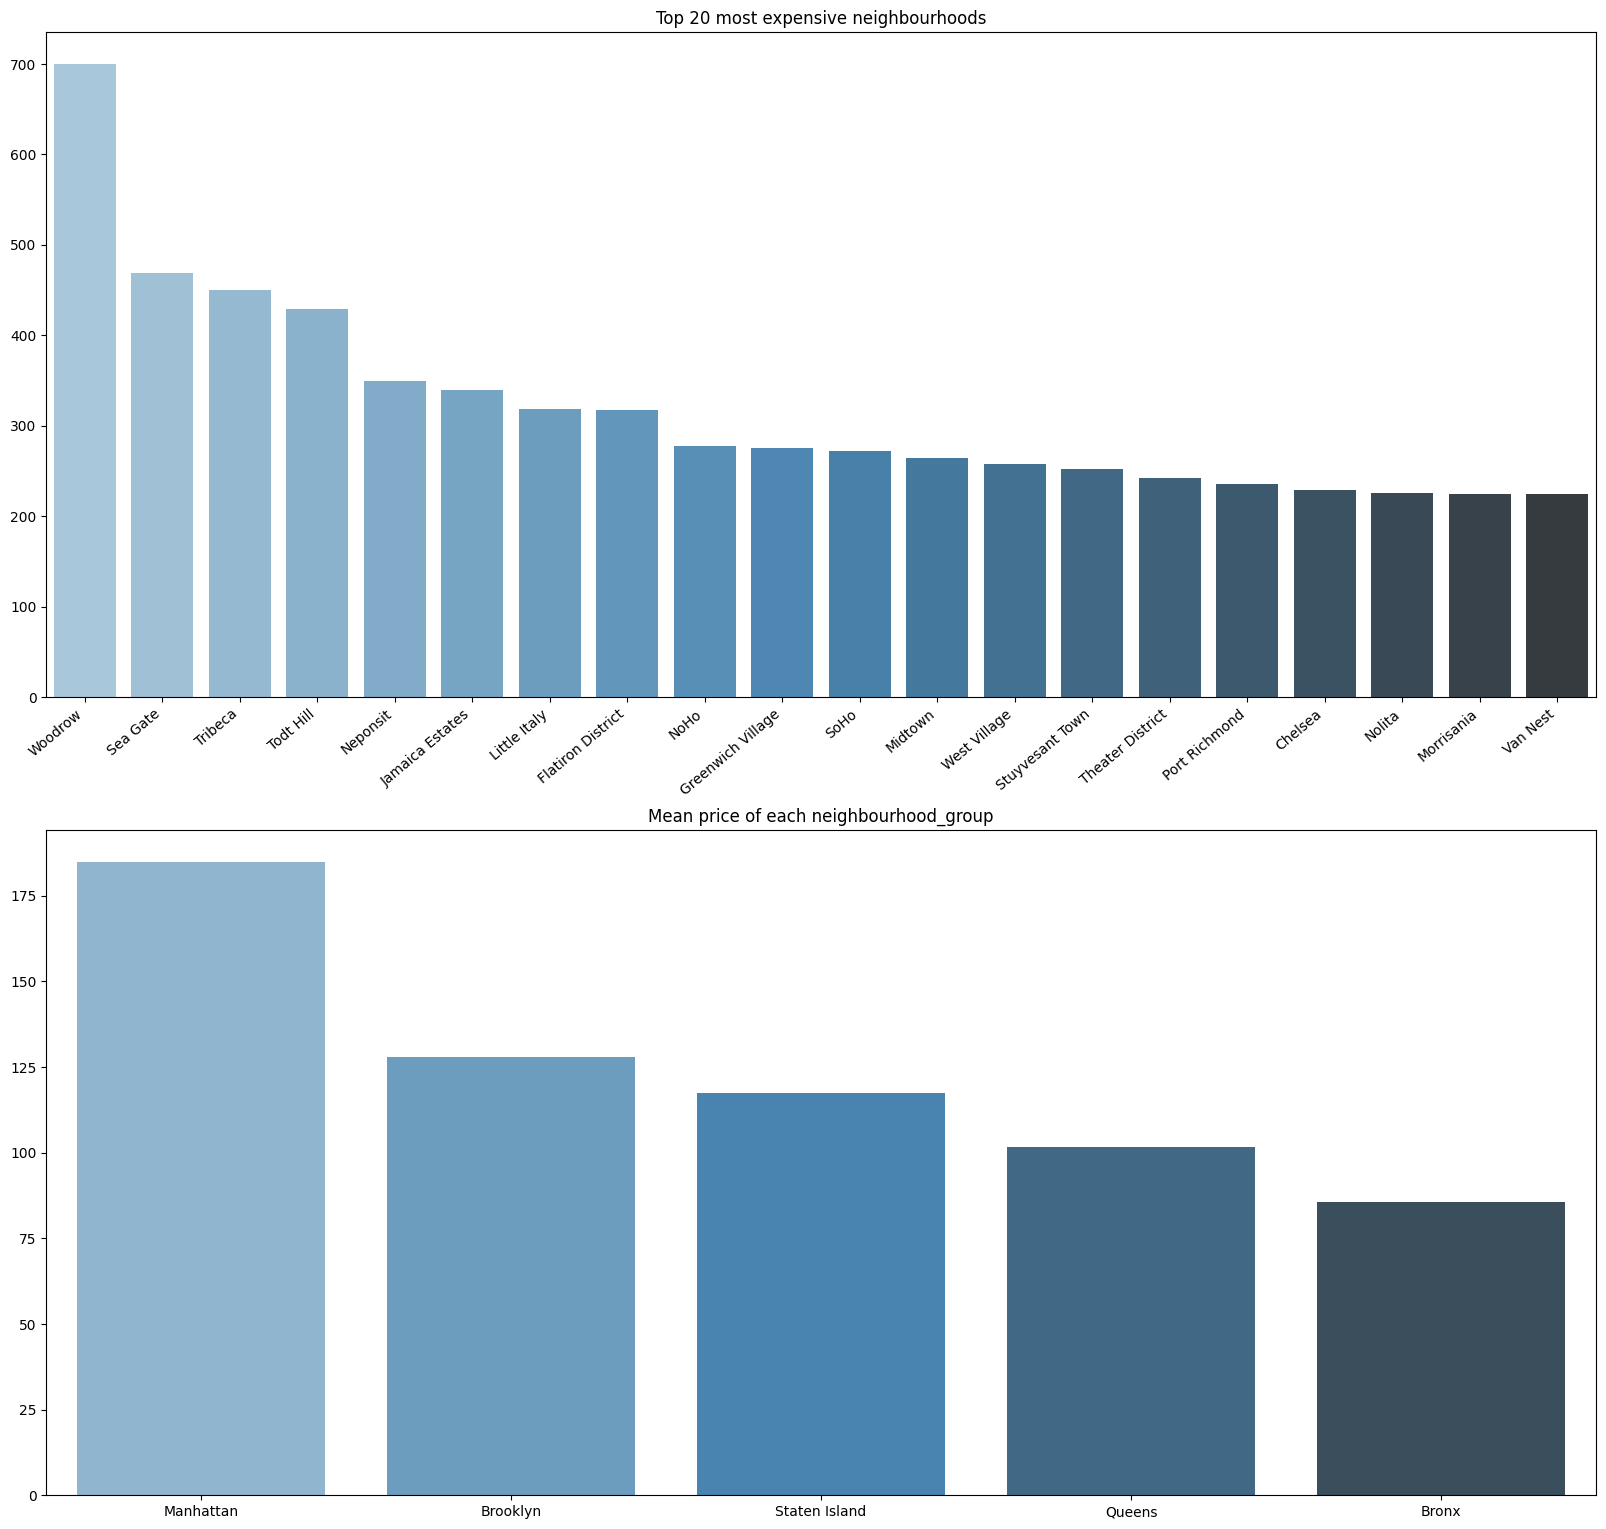

In [9]:
d = airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(x=d.index.tolist()[:20], y=d.values[:20], ax=ax[0], palette="Blues_d")

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods')

d = airbnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(x=d.index.tolist(),y=d.values, ax=ax[1], palette=("Blues_d"))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Mean price of each neighbourhood_group')

fig.show()

The prices depending the room type



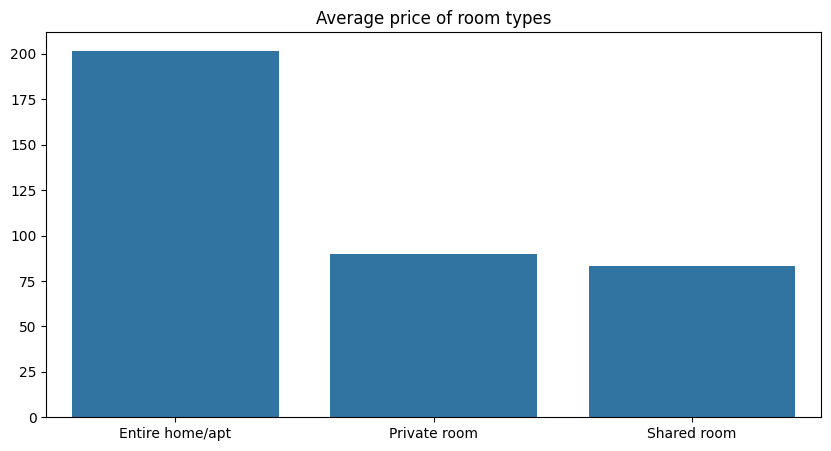

In [30]:
d = airbnb.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('Average price of room types')
fig.show()

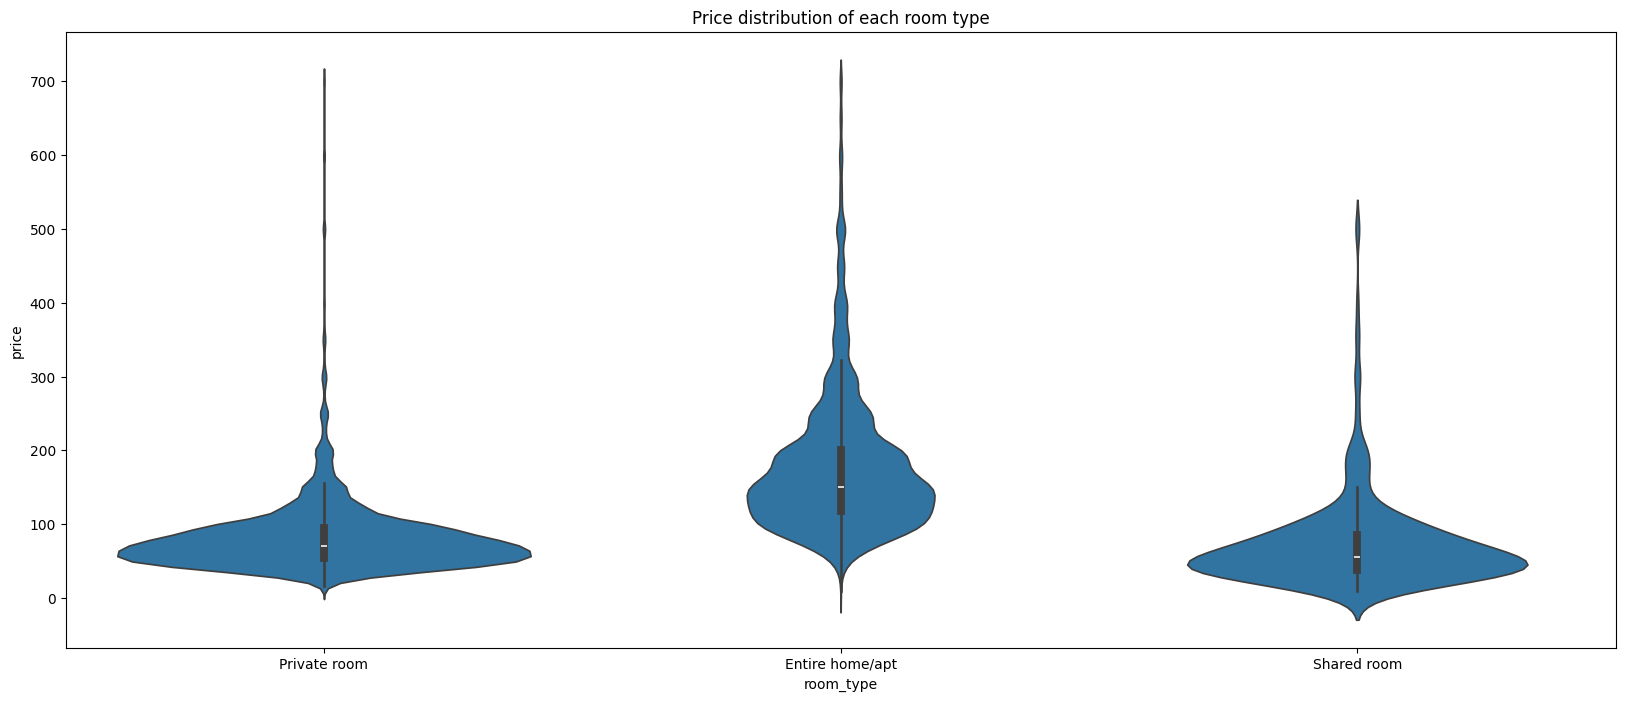

In [11]:
fig, ax= plt.subplots(figsize=(20,8))
sns.violinplot(x="room_type", y="price", data=airbnb[airbnb['price'] <= 700], ax=ax)
ax.set_title('Price distribution of each room type')
fig.show()

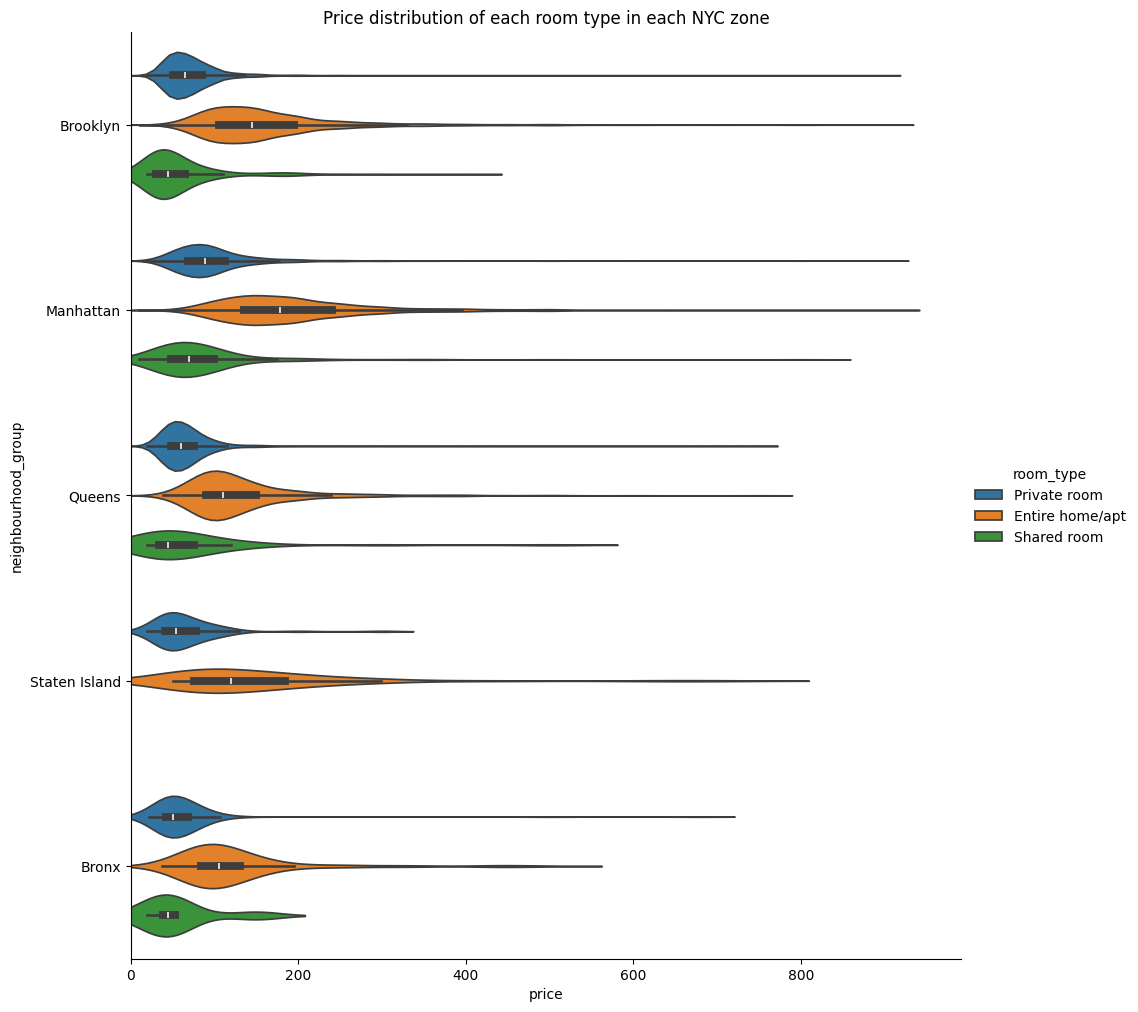

In [31]:
f = sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data=airbnb[airbnb['price'] <= 900],
                kind='violin', height=10)
f.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.show()

 The prices depending on the popularity of the property

In [13]:
from plotly import express as px

In [32]:
px.scatter(airbnb[airbnb['price']<700], x="reviews_per_month", y='price', color='room_type',
           title='Popularity/Price')

How the prices vary with the number of nights

In [15]:
airbnb['minimum_nights'].describe()

count    22043.000000
mean         7.366284
std         22.937050
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [16]:
print(f'Percentile 95 of minimum_nights: {np.percentile(airbnb["minimum_nights"], 95)}')
print(f'Mean of minimum_nights: {np.mean(airbnb["minimum_nights"])}')
print(f"Mode of minimum_nights: {airbnb[(airbnb['minimum_nights'] <= 30) &
 (airbnb['minimum_nights'] > 0)]['minimum_nights'].mode()[0]}")

Percentile 95 of minimum_nights: 30.0
Mean of minimum_nights: 7.366284081114186
Mode of minimum_nights: 1.0


<Axes: xlabel='minimum_nights', ylabel='Density'>

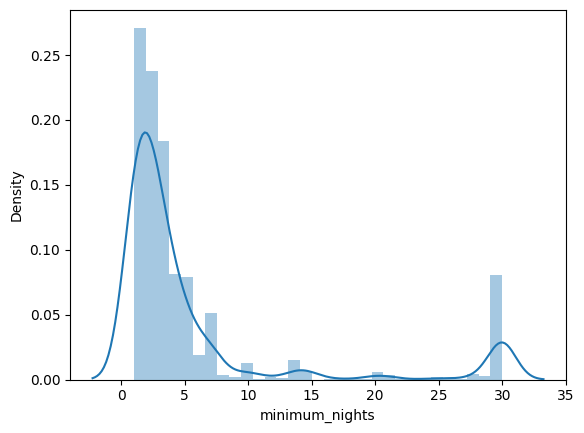

In [17]:
sns.distplot(airbnb[(airbnb['minimum_nights'] <= 30) & (airbnb['minimum_nights'] > 0)]['minimum_nights'],
             bins=31)

In [18]:
d = airbnb[airbnb['minimum_nights'] < 30].groupby('minimum_nights')['price'].median()

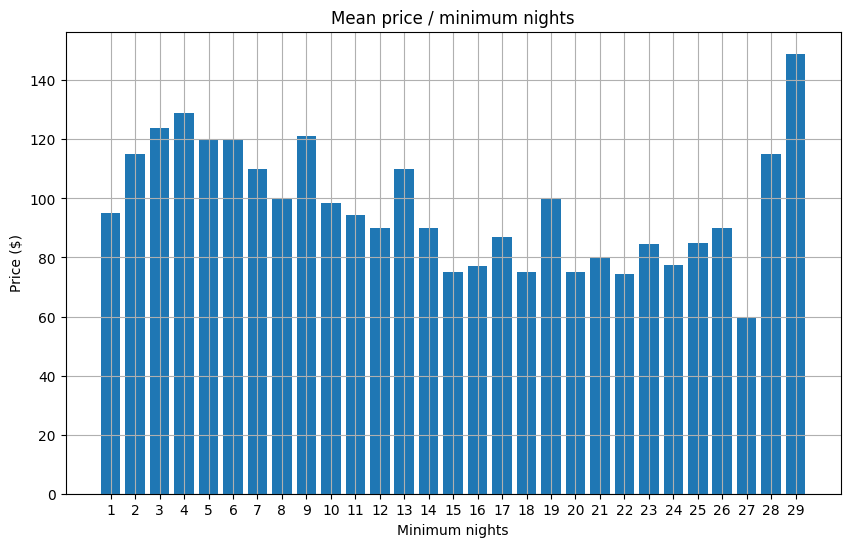

In [19]:
fig = plt.figure(figsize=(10,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Mean price / minimum nights')
plt.xlabel('Minimum nights')
plt.ylabel('Price ($)')
plt.grid(True)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

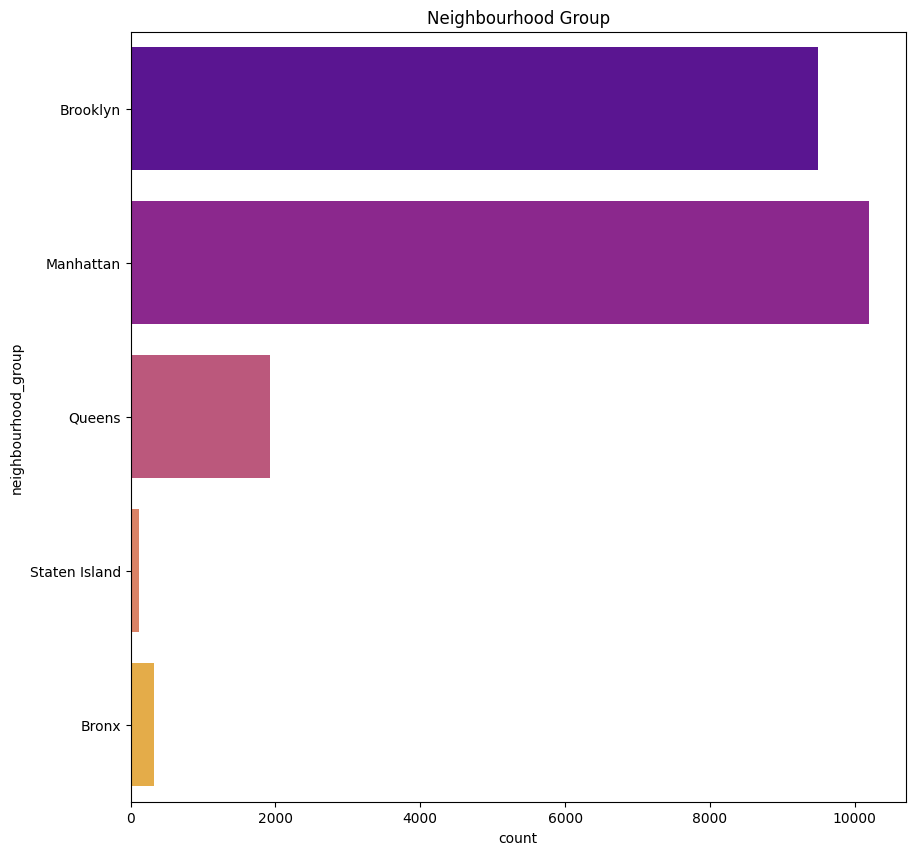

In [20]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

WordCloud

In [21]:
from wordcloud import WordCloud

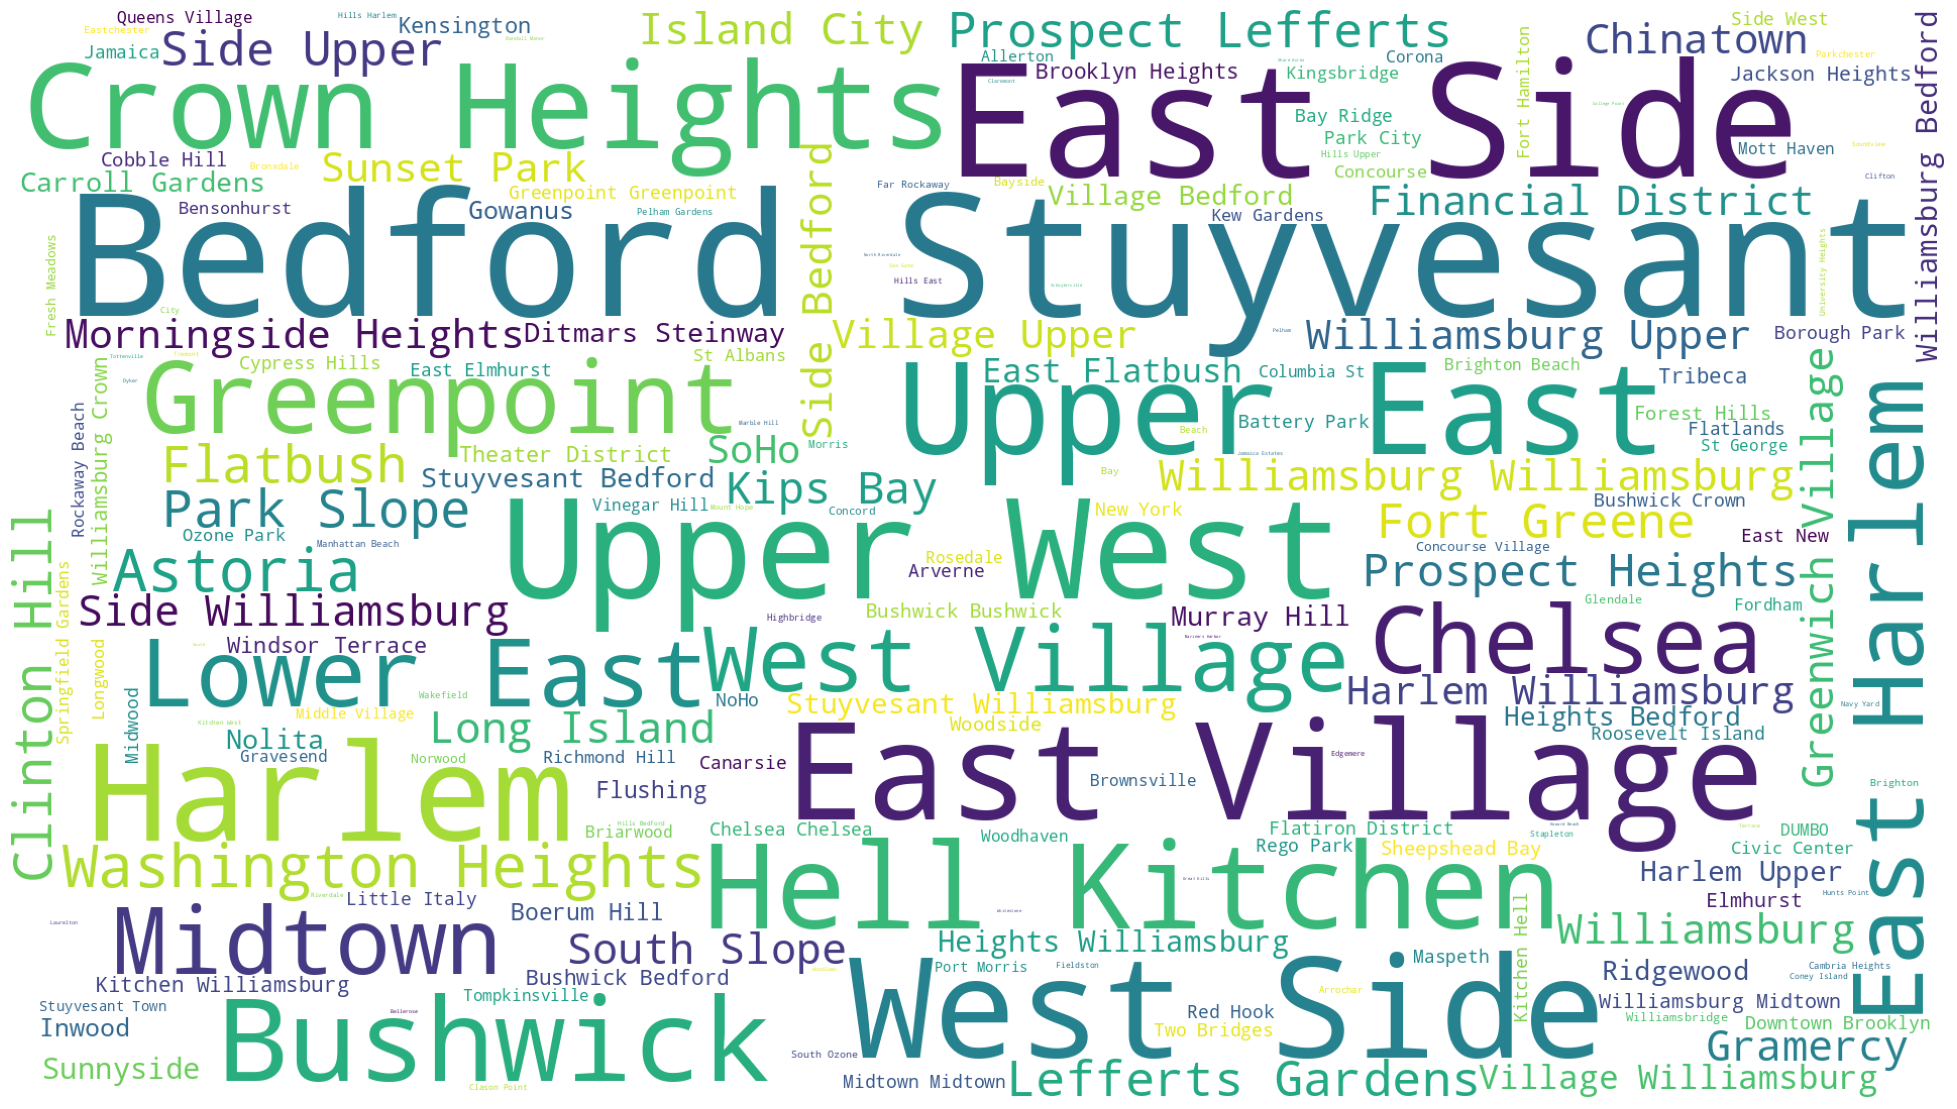

In [22]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Room Descriptions

In [23]:
#Removing words that wouldn't add much
UNWANTED_WORDS = set(['manhattan','Manhattan', 'Brooklyn', 'NYC', 'queen', 'brooklyn', 'nyc'])

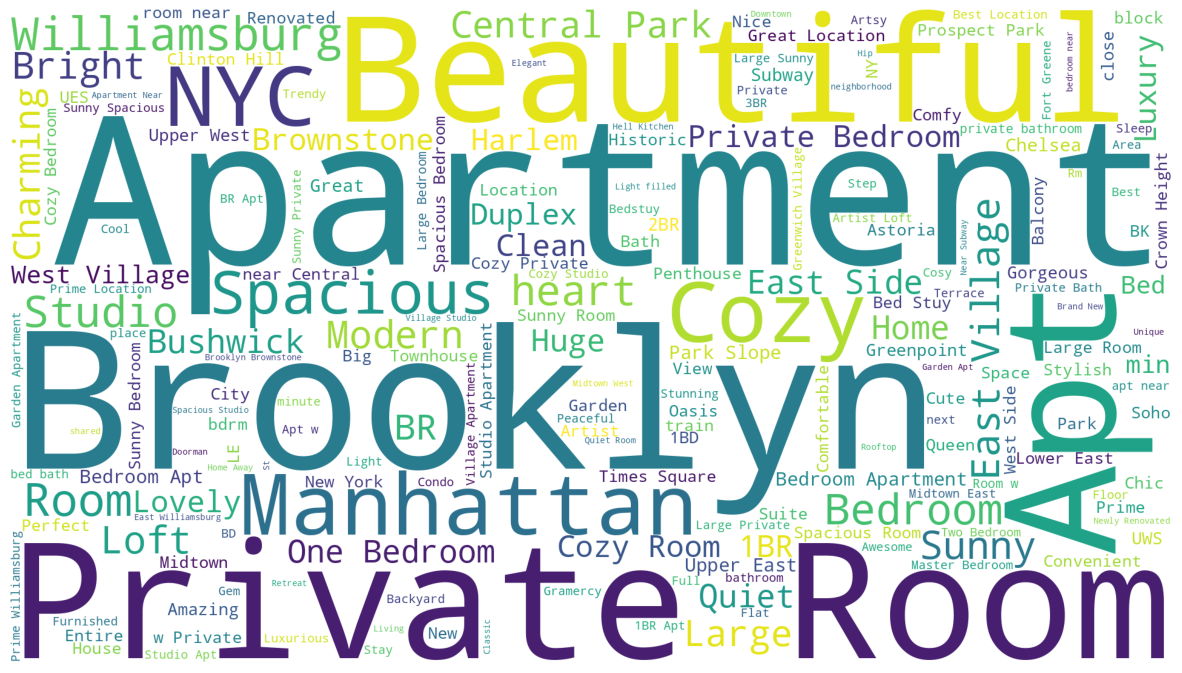

In [24]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

In [25]:
def get_top_terms(documents, ngram_range=(1,1), unwanted_words=set(), min_occurrences=1):
    """ Get a list of the most common n-grams (sorted)
    Params
    ----------
        documents: List of documents to analyze
        ngram_range (tuple): Whether extracting up to n-grams
        unwanted_words (set): Set of custom blacklist of words
        min_occurrences (int): return only words with occurrences >= min_occurrences
    Returns
    ----------
        List of tuples with (word, n_times).
    """

    blacklist = set(stopwords.words('english')).union(unwanted_words)
    stop_words_list = list(blacklist)

    vec = CountVectorizer(stop_words=stop_words_list, ngram_range=ngram_range)

    # Fit the vectorizer and transform the documents
    vec_transformed = vec.fit_transform(documents)

    # Sum the word occurrences
    sum_words = vec_transformed.sum(axis=0)

    # Get the vocabulary and word frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the word frequencies
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Filter words by min_occurrences
    if min_occurrences > 1:
        words_freq = list(filter(lambda x: x[1] >= min_occurrences, words_freq))

    return words_freq

In [26]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams

Getting top n-grams of different categories

In [27]:

from nltk.corpus import stopwords

# Download NLTK stopwords (run once)
import nltk
nltk.download('stopwords')

# Get English stopwords as a list
stop_words_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


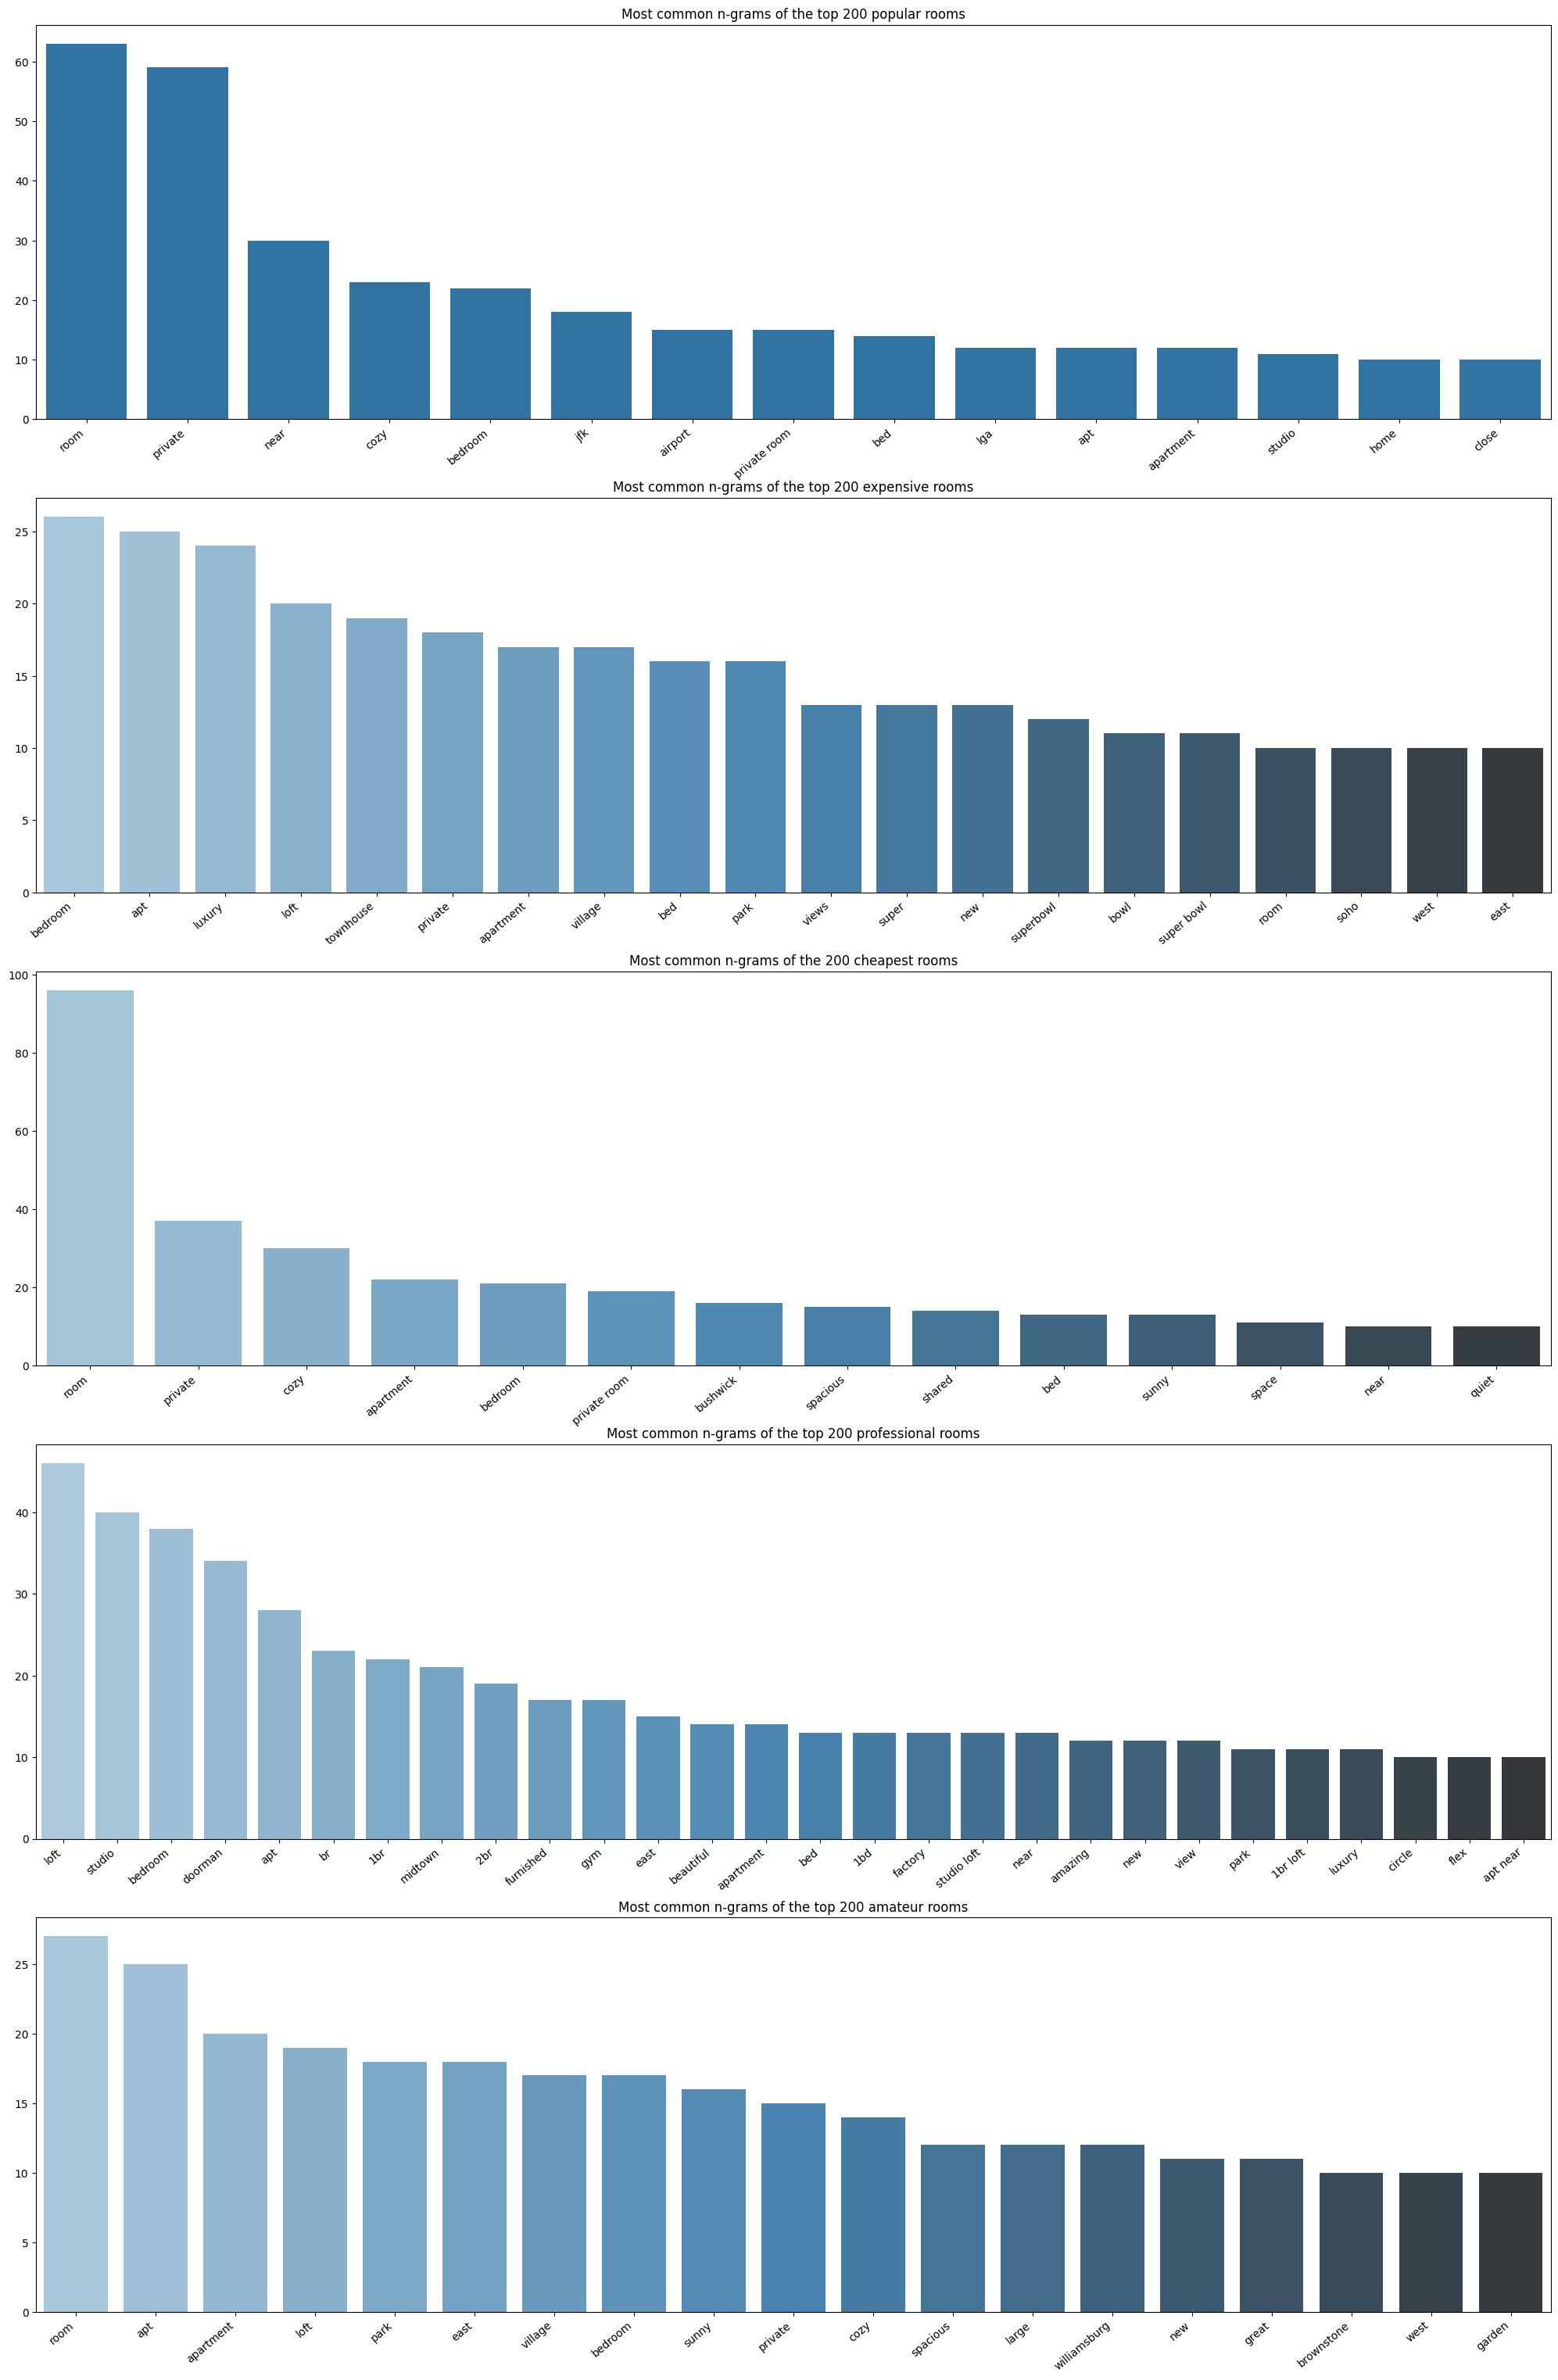

In [28]:
top_ngrams = get_top_terms(airbnb.sort_values('reviews_per_month', ascending=False)['name'].iloc[:200],
                           ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
fig, ax = plt.subplots(5, 1, figsize=(25, 38))
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Most common n-grams of the top 200 popular rooms')


top_ngrams = get_top_terms(airbnb.sort_values('price', ascending=False)['name'].iloc[:200],
                           ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[1],  palette=("Blues_d"))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Most common n-grams of the top 200 expensive rooms')


top_ngrams = get_top_terms(airbnb.sort_values('price', ascending=True)['name'].iloc[:200],
                           ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[2],  palette=("Blues_d"))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_title('Most common n-grams of the 200 cheapest rooms')


top_ngrams = get_top_terms(airbnb[airbnb['calculated_host_listings_count']>50]['name'].iloc[:200],
                           ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[3],  palette=("Blues_d"))
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=40, ha="right")
ax[3].set_title('Most common n-grams of the top 200 professional rooms')


top_ngrams = get_top_terms(airbnb[airbnb['calculated_host_listings_count']<4]['name'].iloc[:200],
                           ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[4],  palette=("Blues_d"))
ax[4].set_xticklabels(ax[4].get_xticklabels(), rotation=40, ha="right")
ax[4].set_title('Most common n-grams of the top 200 amateur rooms')


fig.show()